In [1]:
# Perceptron Binary Classifier

import numpy as np
import matplotlib.pyplot as plt
import pandas
import cPickle

def unpickle( file ):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

# Element SVM Loss function
'''
    def Li_vectorized(x,y,W):
        scores = W.dot(x)
        margins = np.maximum(0, scores-scores[y] + 1)
        margins[y] = 0
        loss_i = np.sum(margins)
        return loss_i
'''

'\n    def Li_vectorized(x,y,W):\n        scores = W.dot(x)\n        margins = np.maximum(0, scores-scores[y] + 1)\n        margins[y] = 0\n        loss_i = np.sum(margins)\n        return loss_i\n'

In [2]:
# Prep Iris set info
data = pandas.read_csv( 'Fisher.csv' )
m = data.as_matrix()
iris_labels = m[:,0]
iris_labels[ iris_labels==2 ] = 1  # squash class 2 into class 1
iris_labels = np.atleast_2d( iris_labels ).T
iris_features = m[:,1:5]

# Prep CIFAR-10 set info
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
cifar_features = data['data']
cifar_labels = data['labels']
cifar_labels = np.atleast_2d( cifar_labels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
cifar_labels[ cifar_labels < 5 ] = 0
cifar_labels[ cifar_labels >= 5 ] = 1

In [3]:
class Perceptron:

    def __init__(self, x, y):
        # x: training set. Rows are images, elements are features.
        # y: labels. 1-D array.
        self.x = np.vstack((x.T, np.ones(x.shape[0]))).T # Change shape for bias
        self.y = y
        self.reset() # self.W = weights and bias,
    
    # Train on the i'th image once:
    def step(self, i, c):
        # i: index of current image.
        # c: learning rate. Scalar.
        t = self.y[i][0] # Desired result
        z = self.W.dot(self.x[i]) > 0 # Current result; Heaviside.
        L_i = t-z
        if L_i != 0: # Only update if there's a problem:
            self.W += c * L_i * self.x[i] # Update weights
        return L_i
    
    # Train through all images in the set once:
    def epoch(self, c):
        # L = [self.step(i,c) for i in range(len(self.x))] # WILL LIST COMPREHENSION BREAK SEQUENTIAL TRAINING ???
        L = np.zeros(len(self.x)) # Loss
        #weights_norm = np.zeros(len(x))
        for i in range(len(self.x)):
            L[i] = self.step(i,c)
            #weights_norm[i] = np.linalg.norm(self.W)
        classification_accuracy = sum(L)/float(len(L))
        self.L_hist.append(classification_accuracy)
        self.W_norm_hist.append(np.linalg.norm(self.W))
        return classification_accuracy
    
    def reset(self):
        self.W = np.random.randn(self.x.shape[1]) # +1 already in for bias
        self.L_hist = []
        self.W_norm_hist = []
        self.L_hist_detailed = []
        self.W_norm_hist_detailed = []
            
    def train(self, c, epochs=100, epsilon=None):
        print "Training..."
        for I in range(epochs):
            print "\rTraining epoch: " + str(I)
            L = self.epoch(c)
            if epsilon != None and L < epsilon: break
        
    def train_detailed(self, c, steps=100, epsilon=None):
        L_i = []
        for i in range(steps):
            L_i.append(self.step(i%len(self.x), c))
            L = sum(L_i)/float(len(L_i))
            self.L_hist_detailed.append(L)
            self.W_norm_hist_detailed.append(np.linalg.norm(self.W))
            if epsilon != None and L_i < epsilon: break
        
    def get_results(self, detailed=False):
        if detailed:
            return self.L_hist_detailed, (self.W_norm_hist_detailed)
        else:
            return self.L_hist, (self.W_norm_hist)

In [4]:
pi = Perceptron(iris_features, iris_labels)
pi.train_detailed(1)
Li,Wi = pi.get_results(True)
pi.reset()
pi.train_detailed(.1)
Li1,Wi1 = pi.get_results(True)
pi.reset()
pi.train_detailed(.01)
Li01,Wi01 = pi.get_results(True)
"""
pi.reset()
pi.train(1)
Li1d,Wi1d = pi.get_results()"""

pc = Perceptron(cifar_features, cifar_labels)
pc.train_detailed(.001,1000)
Lc001,Wc001 = pc.get_results(True)
pc.reset()
pc.train_detailed(.00001,1000)
Lc00001,Wc00001 = pc.get_results(True)

# Convert loss to Classification Accuracy percentage
Li = (1-np.abs(Li))*100
Li1 = (1-np.abs(Li1))*100
Li01 = (1-np.abs(Li01))*100
Lc001 = (1-np.abs(Lc001))*100
Lc00001 = (1-np.abs(Lc00001))*100

<IPython.core.display.Javascript object>


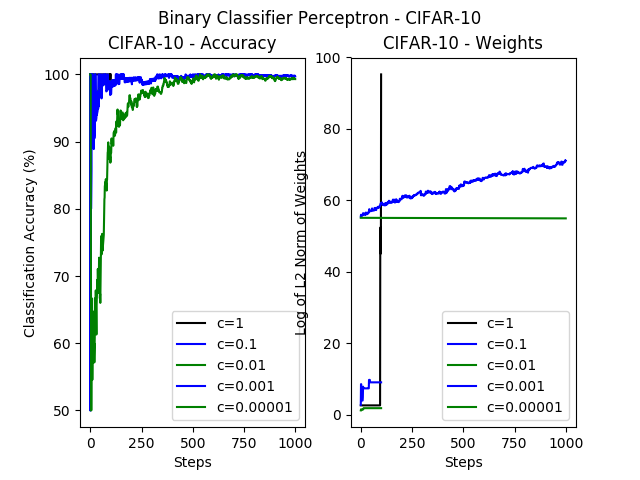

In [6]:
#%matplotlib notebook

plt.suptitle("Binary Classifier Perceptron - Iris")

plt.subplot(1,2,1)
plt.title("Iris - Accuracy")
plt.xlabel("Steps")
plt.ylabel("Classification Accuracy (%)")
plt.plot(range(len(Li)),Li,"k-", label="c=1")
plt.plot(range(len(Li1)),Li1,"b-", label="c=0.1")
plt.plot(range(len(Li01)),Li01,"g-", label="c=0.01")
plt.legend()

plt.subplot(1,2,2)
plt.title("Iris - Weights")
plt.xlabel("Steps")
plt.ylabel("Log of L2 Norm of Weights")
plt.plot(range(len(Wi)),Wi,"k-", label="c=1")
plt.plot(range(len(Wi1)),Wi1,"b-", label="c=0.1")
plt.plot(range(len(Wi01)),Wi01,"g-", label="c=0.01")
plt.legend()

plt.show()

plt.suptitle("Binary Classifier Perceptron - CIFAR-10")

plt.subplot(1,2,1)
plt.title("CIFAR-10 - Accuracy")
plt.xlabel("Steps")
plt.ylabel("Classification Accuracy (%)")
plt.plot(range(len(Lc001)),Lc001,"b-", label="c=0.001")
plt.plot(range(len(Lc00001)),Lc00001,"g-", label="c=0.00001")
plt.legend()

plt.subplot(1,2,2)
plt.title("CIFAR-10 - Weights")
plt.xlabel("Steps")
plt.ylabel("Log of L2 Norm of Weights")
plt.plot(range(len(Wc001)),Wc001,"b-", label="c=0.001")
plt.plot(range(len(Wc00001)),Wc00001,"g-", label="c=0.00001")
plt.legend()

plt.show()